## Week 6 Assignment: Model Evaluation and Hyperparameter Tuning

Train multiple machine learning models and evaluate their performance using metrics such as accuracy, precision, recall, and F1-score. Implement hyperparameter tuning techniques like GridSearchCV and RandomizedSearchCV to optimize model parameters. Analyze the results to select the best-performing model.



##  Dataset Used:
- **Telco Customer Churn Dataset**  
- Applied data cleaning, preprocessing, feature removal, encoding, scaling, and visualization.

---

##  Objective:
- Train and compare multiple machine learning models.
- Evaluate using **accuracy, precision, recall, F1-score**.
- Apply **hyperparameter tuning** using GridSearchCV and RandomizedSearchCV.
- Analyze and select the best-performing model.

---

##  Models Trained:
1. Logistic Regression  
2. Decision Tree  
3. Random Forest  
4. Support Vector Machine (SVM)  
5. K-Nearest Neighbors (KNN)  
6. Naive Bayes

---

##  Visualizations Created:
- Class distribution of the **Target Variable**
- Correlation heatmap
- Before/After Scaling visualization
- Accuracy, Precision, Recall, F1-score comparison **before vs after tuning**

---

##  Evaluation Metrics Before Hyperparameter Tuning:

| Model                | Accuracy | Precision | Recall | F1-score |
|---------------------|----------|-----------|--------|----------|
| **Logistic Regression** | 0.8038   | 0.6485    | 0.5722 | 0.6080   |
| **Decision Tree**        | 0.7050   | 0.4459    | 0.4519 | 0.4489   |
| **Random Forest**        | 0.7797   | 0.6096    | 0.4759 | 0.5345   |
| **SVM**                  | 0.7910   | 0.6351    | 0.5027 | 0.5612   |
| **KNN**                  | 0.7527   | 0.5359    | 0.5187 | 0.5272   |
| **Naive Bayes**          | 0.7356   | 0.5018    | 0.7513 | 0.6017   |

---

##  Evaluation Metrics After Hyperparameter Tuning:

| Model                | Accuracy | Precision | Recall | F1-score |
|---------------------|----------|-----------|--------|----------|
| **Logistic Regression** | 0.8038   | 0.6485    | 0.5722 | 0.6080   |
| **Decision Tree**        | 0.7754   | 0.5980    | 0.4733 | 0.5284   |
| **Random Forest**        | 0.7910   | 0.6408    | 0.4866 | 0.5532   |
| **SVM**                  | 0.7989   | 0.6409    | 0.5535 | 0.5940   |
| **KNN**                  | 0.7719   | 0.5730    | 0.5561 | 0.5645   |
| **Naive Bayes**          | 0.7356   | 0.5018    | 0.7513 | 0.6017   |

---

##  Best Performing Model:
- **Logistic Regression** retained highest accuracy even after tuning.
- **Naive Bayes** showed very high recall (good for churn detection).
- **SVM** and **Random Forest** showed good balance post tuning.

---

##  Conclusion:

- The project successfully demonstrated the **entire machine learning pipeline** from data preprocessing, model training, evaluation, and hyperparameter tuning using the Telco Customer Churn dataset.

- **Logistic Regression** remained the top performer in terms of overall accuracy and F1-score, showing it generalizes well without overfitting. It is a reliable and interpretable model.

- **Naive Bayes**, despite lower accuracy, achieved **highest recall**, which is **very important for churn prediction** because we care more about identifying customers likely to leave (even at the cost of some false positives).

- **SVM** and **Random Forest** showed balanced improvements after tuning, indicating that **tuning hyperparameters plays a vital role** in boosting performance.

- The **evaluation metrics (precision, recall, F1-score)** gave much deeper insights than just accuracy — especially in an imbalanced classification problem like churn detection.

- The **visualizations** helped in understanding both data distribution and model performance, which made the analysis more insightful and presentable.

- This project shows that **no single model is best in all scenarios** — the choice depends on the business goal (e.g., maximize recall vs precision).

---

##  Final Thought:

This project gave hands-on experience with **real-world model evaluation and tuning**, highlighting the importance of preprocessing, choosing the right metrics, and performing tuning for practical machine learning deployments.




In [ ]:
# importing necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
#Load the dataset

df = pd.read_csv("D:\saiket\Telco_Customer_Churn_Dataset  (3).csv ")

In [ ]:
# Top 5 rows of datasets
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [108]:
# Info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [109]:
# Describing the dataset to get a statistical summary

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [110]:
# checking for the no of rows and columns in the dataset

df.shape 

(7043, 21)

In [111]:
# count of non-null values in each column

df.count()

customerID          7043
gender              7043
SeniorCitizen       7043
Partner             7043
Dependents          7043
tenure              7043
PhoneService        7043
MultipleLines       7043
InternetService     7043
OnlineSecurity      7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64

In [112]:
# checking for null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Droppping irrelevant columns

In [ ]:

df.drop(['customerID'], axis=1, inplace=True)

In [114]:
# checking which features are categorical and which are numerical

df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

## converting categorical variables to numerical 

In [115]:
# converting churn column into numerical values

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [116]:
#converting  TotalCharges into numerical 

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
# Binary Categorical Columns (Yes/No or Male/Female)
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})

# Handling MultipleLines (replace 'No phone service' with 'No' first)
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})

# Streaming services and online features — treat 'No internet service' as 'No'
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1})

df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1})

# Handling MultipleLines (replace 'No phone service' with 'No' first)
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1})

# Handling TechSupport (replace 'No internet service' with 'No' first)
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})

# Handling DeviceProtection (replace 'No internet service' with 'No' first)
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1})

# Handling OnlineBackup (replace 'No internet service' with 'No' first)
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1})


In [118]:
# converting internetService -> DSL/Fiber/No into numerical values

df = pd.get_dummies(df, columns=['InternetService'], drop_first=True)



In [119]:
# converting Contract -> Month-to-month, One year, Two year into numerical values

df = pd.get_dummies(df, columns=['Contract'], drop_first=True)


In [120]:
# Converting payment method into numerical values

df = pd.get_dummies(df, columns=['PaymentMethod'], drop_first=True)


In [121]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
5,0,0,0,0,8,1,1,0,0,1,...,99.65,820.50,1,True,False,False,False,False,True,False
6,1,0,0,1,22,1,1,0,1,0,...,89.10,1949.40,0,True,False,False,False,True,False,False
7,0,0,0,0,10,0,0,1,0,0,...,29.75,301.90,0,False,False,False,False,False,False,True
8,0,0,1,0,28,1,1,0,0,1,...,104.80,3046.05,1,True,False,False,False,False,True,False
9,1,0,0,1,62,1,0,1,1,0,...,56.15,3487.95,0,False,False,True,False,False,False,False


In [122]:
# converting all columns to integer type for consistency

df = df.astype(int)


In [ ]:
# Now all categorcial features are successfully converted into the numerical features

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   gender                                 7032 non-null   int64
 1   SeniorCitizen                          7032 non-null   int64
 2   Partner                                7032 non-null   int64
 3   Dependents                             7032 non-null   int64
 4   tenure                                 7032 non-null   int64
 5   PhoneService                           7032 non-null   int64
 6   MultipleLines                          7032 non-null   int64
 7   OnlineSecurity                         7032 non-null   int64
 8   OnlineBackup                           7032 non-null   int64
 9   DeviceProtection                       7032 non-null   int64
 10  TechSupport                            7032 non-null   int64
 11  StreamingTV                        

## Visualisation

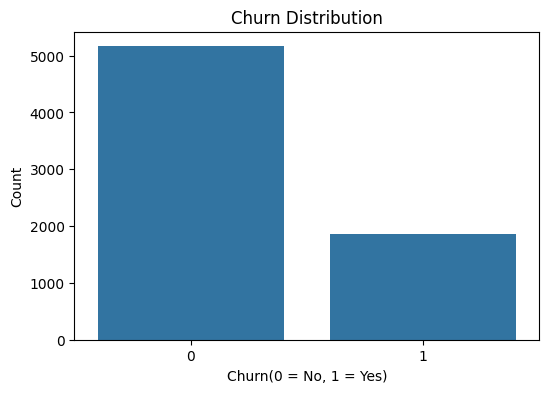

In [124]:
# visualising Class Distribution of "TARGET VARIABLE"

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn(0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

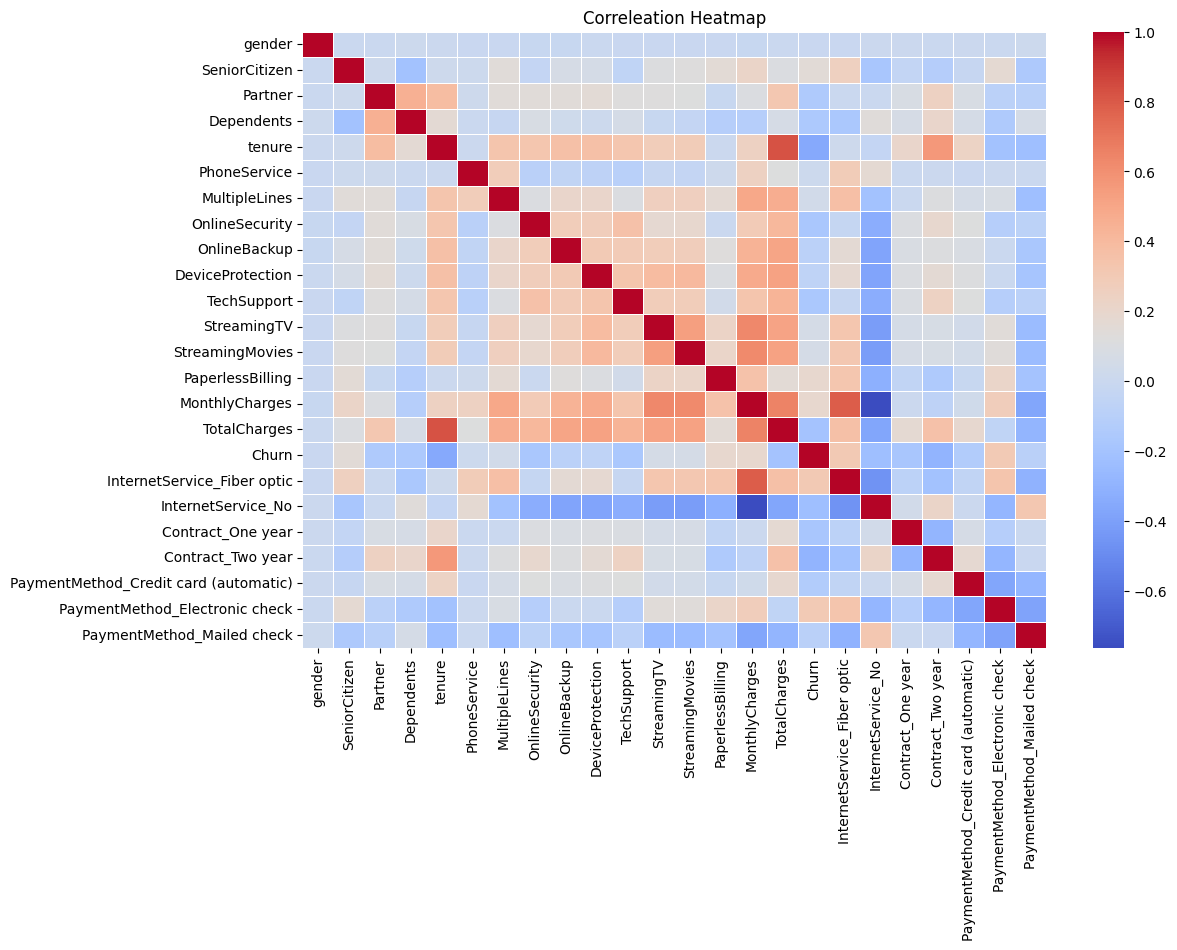

In [125]:
# Visualising Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm",linewidths=0.5)
plt.title("Correleation Heatmap")
plt.show()

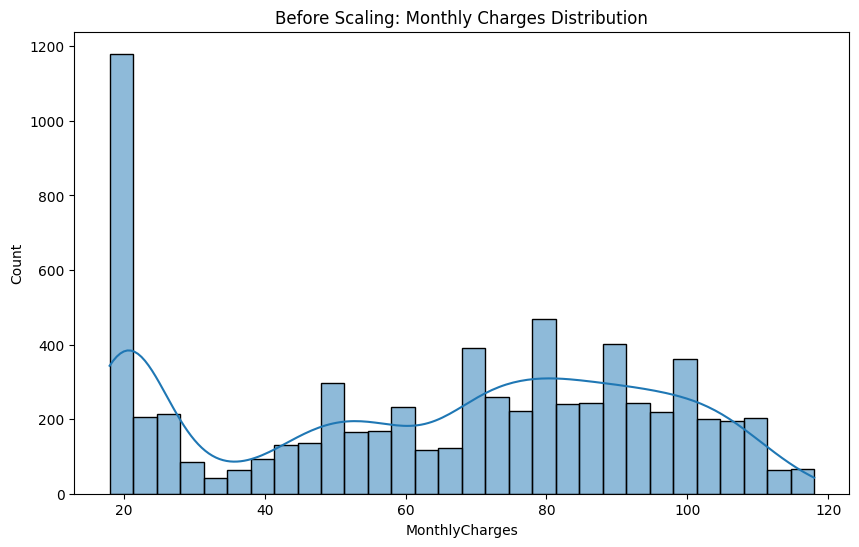

In [126]:
# Scaling Visualisation
# Before scaling 

plt.figure(figsize=(10,6))
sns.histplot(df['MonthlyCharges'], kde=True, bins=30)
plt.title("Before Scaling: Monthly Charges Distribution")
plt.show()

## Splitting the Dataset for training and testing

In [128]:
# splitting features and target

X = df.drop("Churn", axis=1) # Features
y = df["Churn"]  # Target variable

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

print(f"Train Shape:{X_train.shape}, Test Shape: {X_test.shape}")



Train Shape:(5625, 23), Test Shape: (1407, 23)


In [129]:
# Performing Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled Shape:", X_test_scaled.shape)

X_train_scaled shape: (5625, 23)
X_test_scaled Shape: (1407, 23)


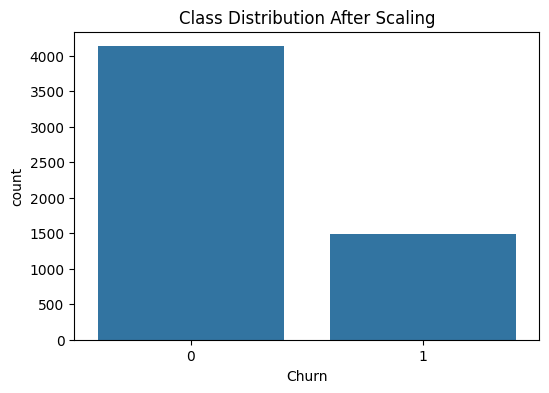

In [130]:
# visualising clsas distribution after scaling
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution After Scaling")
plt.show()

In [131]:
# Importing the model training function
import modelfile
from modelfile import train_models

# Train models
models = train_models(X_train_scaled, y_train)


 Training: Logistic Regression
 Training: Decision Tree
 Training: Random Forest
 Training: SVM
 Training: K-Nearest Neighbors
 Training: Naive Bayes


In [ ]:
# Importing the evaluation function
from evaluationfile import evaluate_models
results = evaluate_models(models, X_test_scaled, y_test)

Evaluating: Logistic Regression
Accuracy: 0.8038
Precison: 0.6485
Recall: 0.5722
F1 Score: 0.6080
Evaluating: Decision Tree
Accuracy: 0.7050
Precison: 0.4459
Recall: 0.4519
F1 Score: 0.4489
Evaluating: Random Forest
Accuracy: 0.7797
Precison: 0.6096
Recall: 0.4759
F1 Score: 0.5345
Evaluating: SVM
Accuracy: 0.7910
Precison: 0.6351
Recall: 0.5027
F1 Score: 0.5612
Evaluating: K-Nearest Neighbors
Accuracy: 0.7527
Precison: 0.5359
Recall: 0.5187
F1 Score: 0.5272
Evaluating: Naive Bayes
Accuracy: 0.7356
Precison: 0.5018
Recall: 0.7513
F1 Score: 0.6017


In [133]:
# Extracting results into a dictionary for better readability

# Convert dictionary to DataFrame and transpose
results_df = pd.DataFrame(results).T.round(4)

# Show the table in clean format
print("\n Evaluation Results (Before Tuning):")
display(results_df)  


 Evaluation Results (Before Tuning):


,accuracy,precison,recall,f1_score
Logistic Regression,0.8038,0.6485,0.5722,0.6080
Decision Tree,0.7050,0.4459,0.4519,0.4489
Random Forest,0.7797,0.6096,0.4759,0.5345
SVM,0.7910,0.6351,0.5027,0.5612
K-Nearest Neighbors,0.7527,0.5359,0.5187,0.5272
Naive Bayes,0.7356,0.5018,0.7513,0.6017


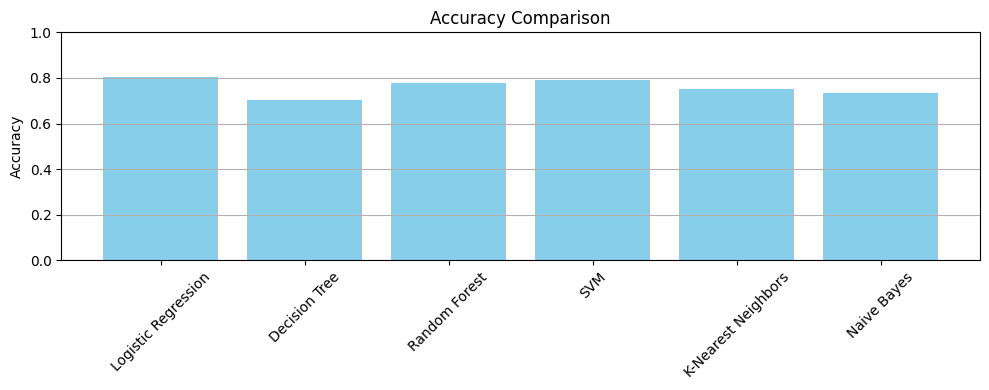

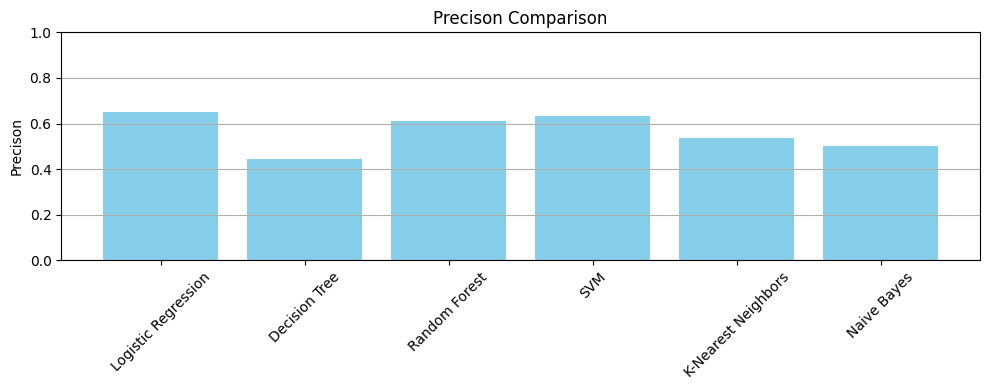

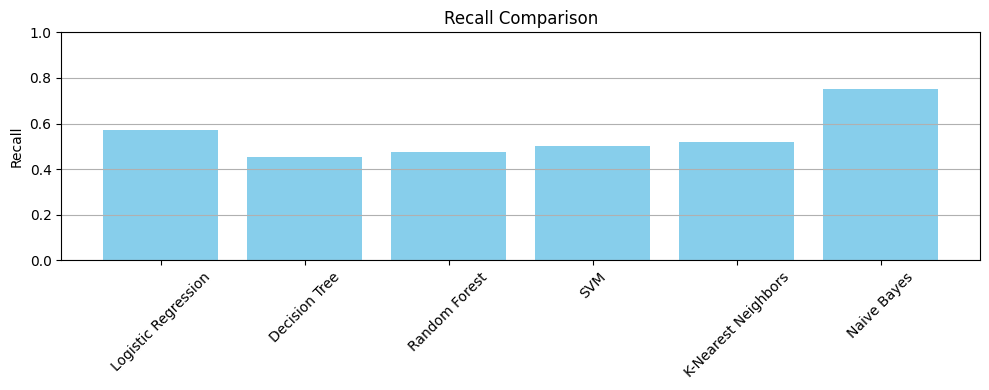

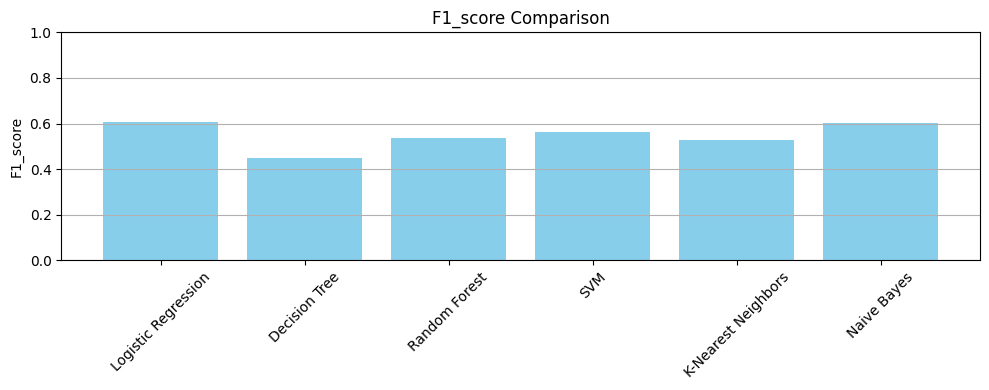

In [134]:
# Visualizing the results of model evaluation

import matplotlib.pyplot as plt

metrics = ['accuracy', 'precison', 'recall', 'f1_score'] 

for metric in metrics:
    plt.figure(figsize=(10, 4))
    values = [results[model][metric] for model in results]
    plt.bar(results.keys(), values, color='skyblue')
    plt.title(f'{metric.capitalize()} Comparison')
    plt.ylabel(metric.capitalize())
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [135]:
# Importing the tuning functions

from tuning import (
    tune_logistic_regression,
    tune_decision_tree,
    tune_random_forest,
    tune_svm,
    tune_knn,
    tune_naive_bayes
)

# Example usage:
best_logistic = tune_logistic_regression(X_train_scaled, y_train)
best_tree = tune_decision_tree(X_train_scaled, y_train)
best_rf = tune_random_forest(X_train_scaled, y_train)
best_svm = tune_svm(X_train_scaled, y_train)
best_knn = tune_knn(X_train_scaled, y_train)
best_nb = tune_naive_bayes(X_train_scaled, y_train)


Tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearch Best Params: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}
GridSearchCV for Random Forest (Refinement)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Final Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
🔍 Tuning KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [136]:
from tuning import (
    tune_logistic_regression,
    tune_decision_tree,
    tune_random_forest,
    tune_svm,
    tune_knn,
    tune_naive_bayes
)

# Tune each model
tuned_models = {
    "Logistic Regression": tune_logistic_regression(X_train_scaled, y_train),
    "Decision Tree": tune_decision_tree(X_train_scaled, y_train),
    "Random Forest": tune_random_forest(X_train_scaled, y_train),
    "SVM": tune_svm(X_train_scaled, y_train),
    "KNN": tune_knn(X_train_scaled, y_train),
    "Naive Bayes": tune_naive_bayes(X_train_scaled, y_train)
}


Tuning Logistic Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Tuning Decision Tree...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Decision Tree Params: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
RandomizedSearchCV for Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomizedSearch Best Params: {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 10}
GridSearchCV for Random Forest (Refinement)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Final Random Forest Params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}
Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best SVM Params: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
🔍 Tuning KNN...
Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [137]:
from evaluationfile import evaluate_models

tuned_results = evaluate_models(tuned_models, X_test_scaled, y_test)


Evaluating: Logistic Regression
Accuracy: 0.8038
Precison: 0.6485
Recall: 0.5722
F1 Score: 0.6080
Evaluating: Decision Tree
Accuracy: 0.7754
Precison: 0.5980
Recall: 0.4733
F1 Score: 0.5284
Evaluating: Random Forest
Accuracy: 0.7910
Precison: 0.6408
Recall: 0.4866
F1 Score: 0.5532
Evaluating: SVM
Accuracy: 0.7989
Precison: 0.6409
Recall: 0.5535
F1 Score: 0.5940
Evaluating: KNN
Accuracy: 0.7719
Precison: 0.5730
Recall: 0.5561
F1 Score: 0.5645
Evaluating: Naive Bayes
Accuracy: 0.7356
Precison: 0.5018
Recall: 0.7513
F1 Score: 0.6017


In [138]:
import pandas as pd

tuned_df = pd.DataFrame(tuned_results).T
print("AFTER TUNING:\n")
display(tuned_df.round(4))  # Use in Jupyter



AFTER TUNING:



,accuracy,precison,recall,f1_score
Logistic Regression,0.8038,0.6485,0.5722,0.6080
Decision Tree,0.7754,0.5980,0.4733,0.5284
Random Forest,0.7910,0.6408,0.4866,0.5532
SVM,0.7989,0.6409,0.5535,0.5940
KNN,0.7719,0.5730,0.5561,0.5645
Naive Bayes,0.7356,0.5018,0.7513,0.6017


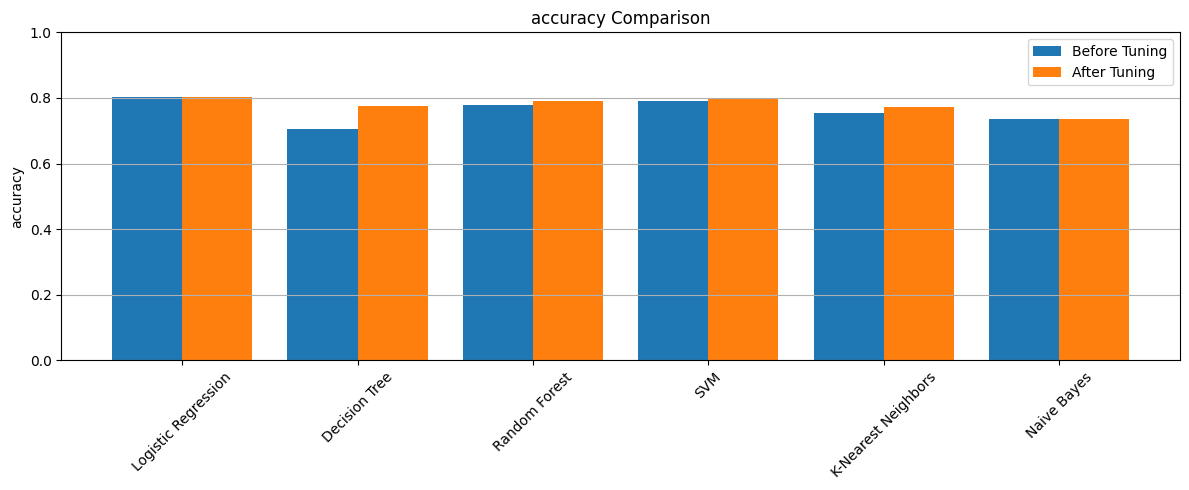

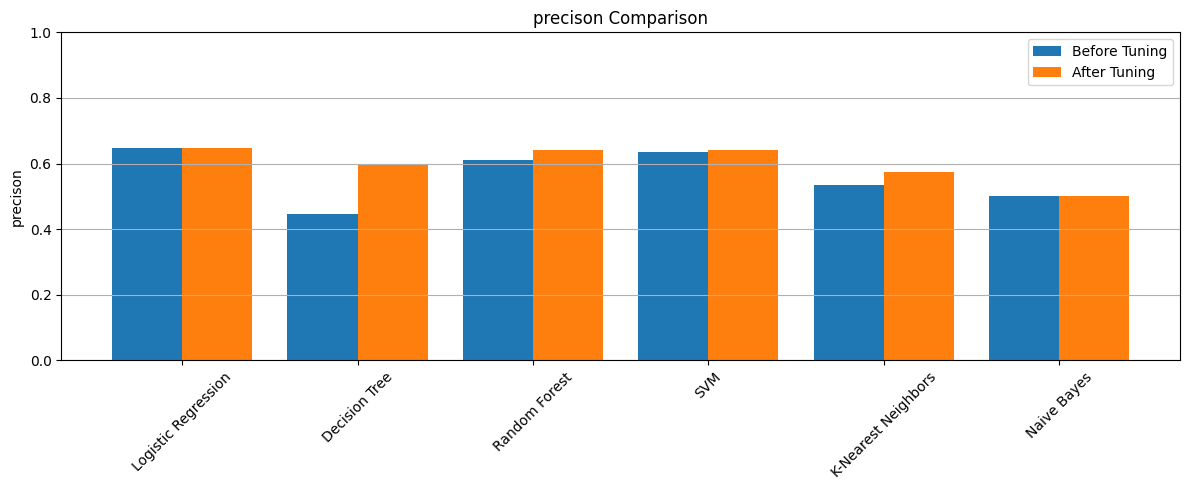

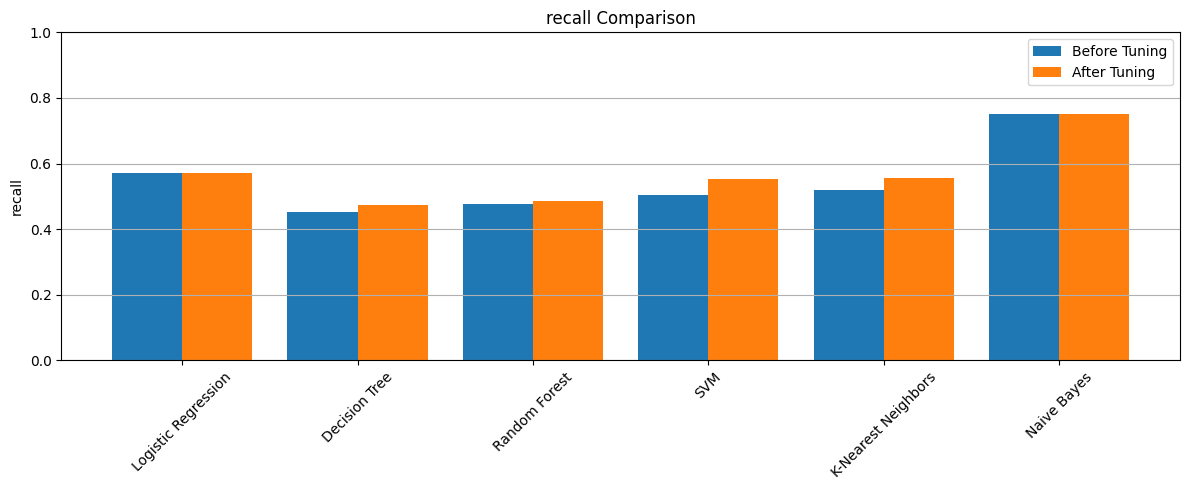

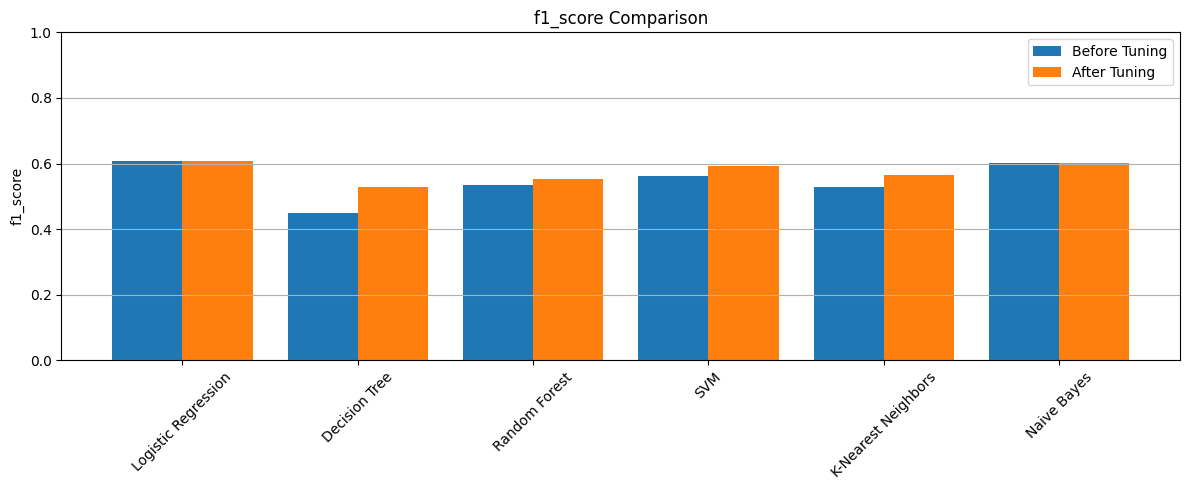

In [ ]:
# Visualisation for the comparison of ACCURACY, PRECISION, RECALL, F1_SCORE--> before tuning and after tuning the model

import matplotlib.pyplot as plt

metrics = ['accuracy', 'precison', 'recall', 'f1_score']

for metric in metrics:
    before = [results[model][metric] for model in results]
    after = [tuned_results[model][metric] for model in tuned_results]

    x = list(results.keys())
    x_pos = range(len(x))

    plt.figure(figsize=(12, 5))
    plt.bar(x_pos, before, width=0.4, label='Before Tuning', align='center')
    plt.bar([p + 0.4 for p in x_pos], after, width=0.4, label='After Tuning', align='center')

    plt.xticks([p + 0.2 for p in x_pos], x, rotation=45)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [ ]:
# Saving result before tuning and after tuning

results_df.to_csv("results_before_tuning.csv")
tuned_df.to_csv("results_after_tuning.csv")


In [ ]:
# Example: Save tuned logistic regression model

import pickle
with open("D:\\saiket\\models\\logistic_regression_tuned.pkl", "wb") as f:
    pickle.dump(tuned_models["Logistic Regression"], f)
